In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

In [4]:
# Load the dataset
df = pd.read_csv(r"C:\Users\USER\Downloads\Warehouse_and_Retail_Sales.csv")

# Part A: Data Overview & Inspection
print("--- Part A: Overview ---")
print("First 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())
print("\nShape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nDescribe:")
print(df.describe())

--- Part A: Overview ---
First 5 rows:
   YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                  BOOTLEG RED - 750ML      WINE          0.00   
1            MOMENT DE PLAISIR - 750ML      WINE          0.00   
2  S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3        SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4       SANTORINI GAVALA WHITE - 750ML      WINE          0.82   

   RETAIL TRANSFERS  WAREHOUSE SALES  
0               0.0              2.0  
1               1.0              4.0  
2               0.0              1.0  
3               0.0          

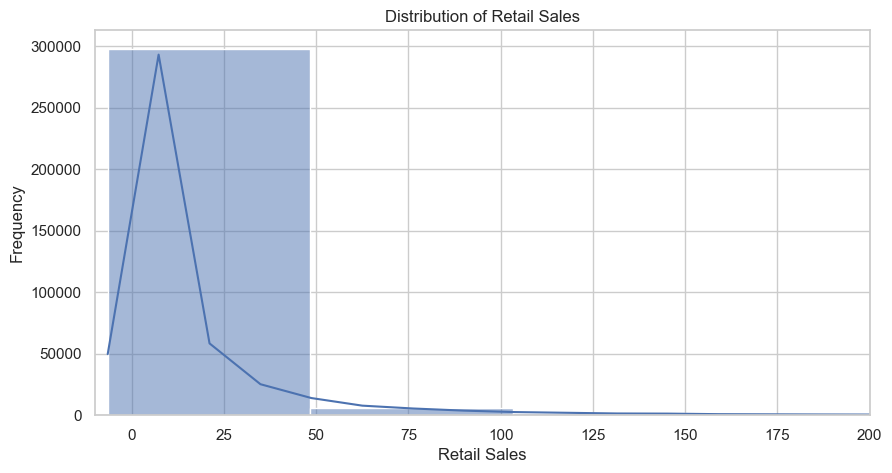

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean data: drop rows with missing retail sales for plotting
df_clean = df.dropna(subset=['RETAIL SALES'])

# Part B - Univariate Analysis: Numerical (RETAIL SALES)
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['RETAIL SALES'], bins=50, kde=True)
plt.title('Distribution of Retail Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Frequency')
plt.xlim(-10, 200) # Limiting for visibility due to extreme outliers
plt.show()

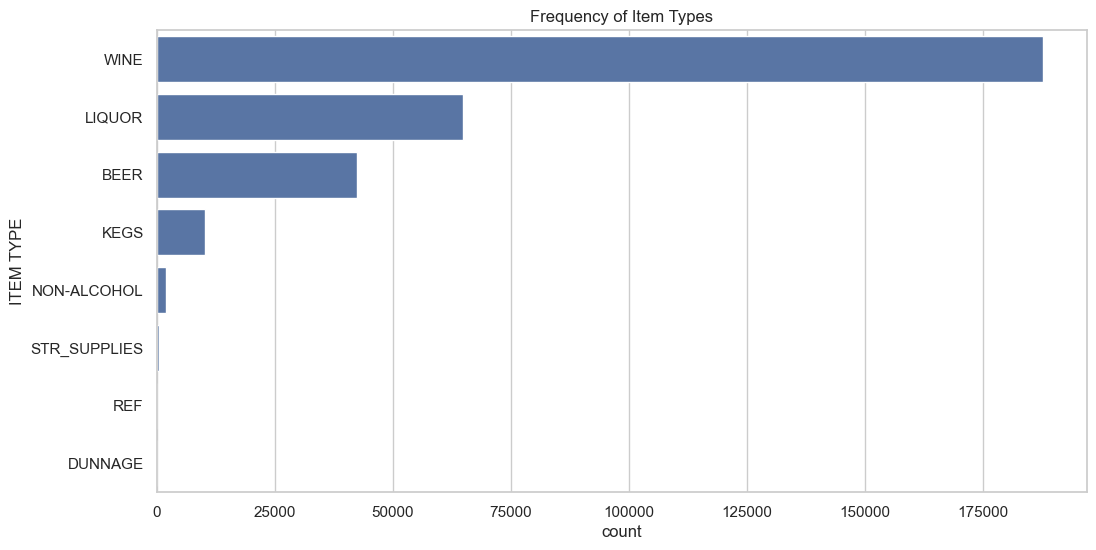

In [9]:

plt.figure(figsize=(12, 6))
order = df['ITEM TYPE'].value_counts().index
sns.countplot(data=df, y='ITEM TYPE', order=order)
plt.title('Frequency of Item Types')
plt.show()

WARE HOUSE SALES may contain large values
YES, THERE are values that suggest multiple outliers

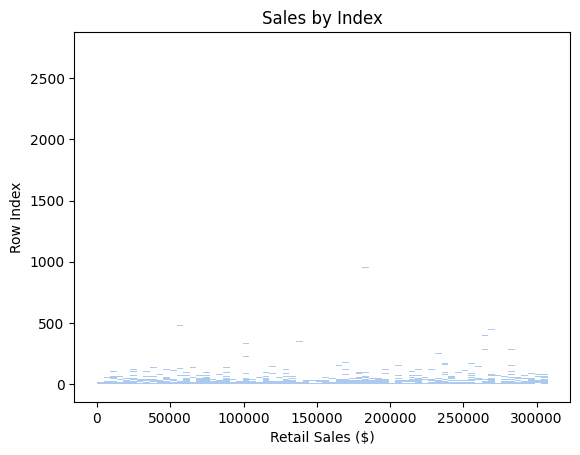

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x=df.index, y='RETAIL SALES')

plt.xlabel('Retail Sales ($)')
plt.ylabel('Row Index')
plt.title('Sales by Index')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1536\2924819573.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_clean, x='ITEM TYPE', y='RETAIL SALES', estimator='sum', ci=None)


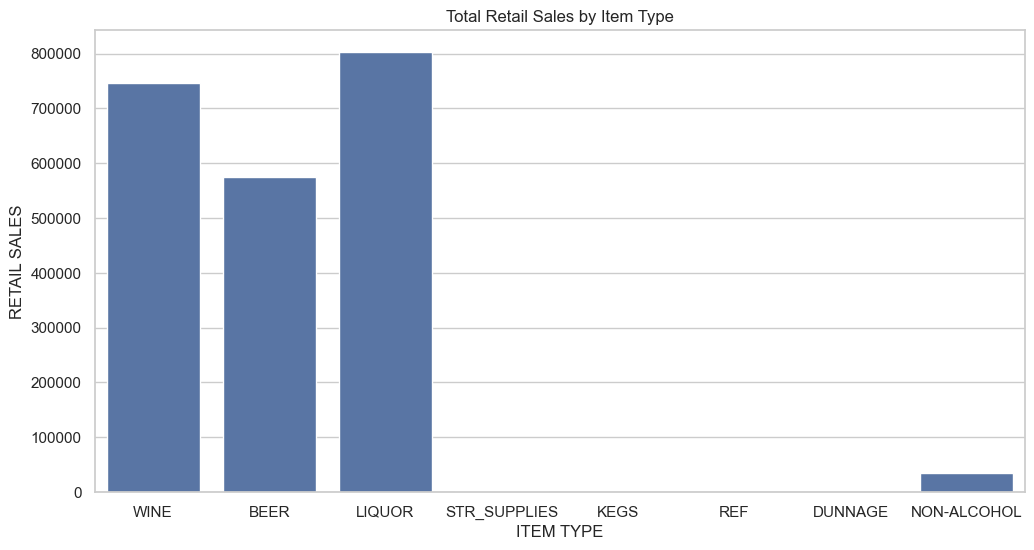

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

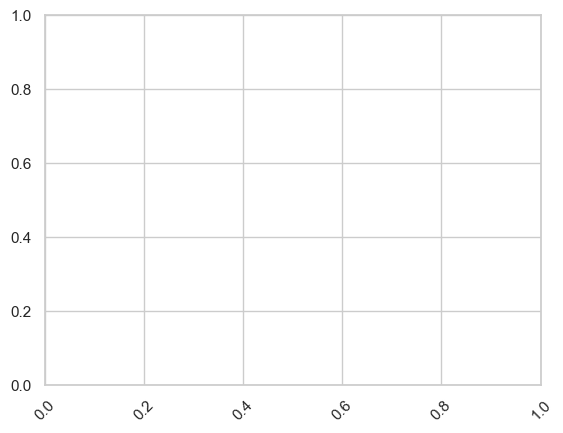

In [8]:
# Part C - Bivariate Analysis (ITEM TYPE vs RETAIL SALES)
plt.figure(figsize=(12, 6))
# Using median to handle outliers in visualization
sns.barplot(data=df_clean, x='ITEM TYPE', y='RETAIL SALES', estimator='sum', ci=None)
plt.title('Total Retail Sales by Item Type')
plt.show()
plt.xticks(rotation=45)


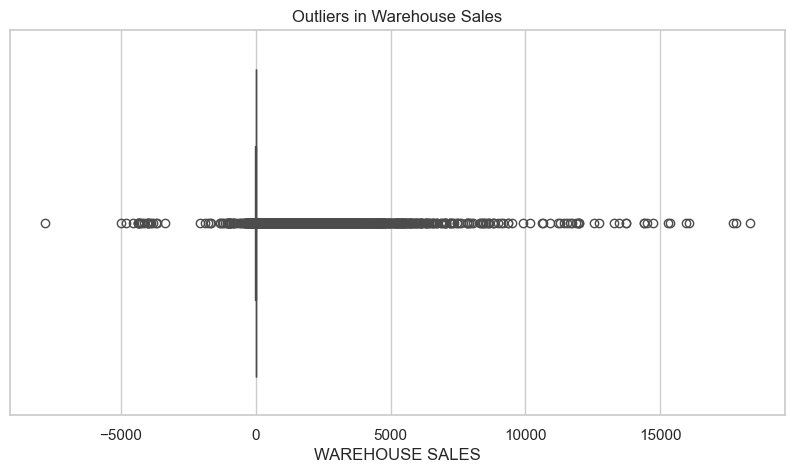

In [11]:
# Part D - Outlier Detection (WAREHOUSE SALES)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['WAREHOUSE SALES'])
plt.title('Outliers in Warehouse Sales')
plt.show()

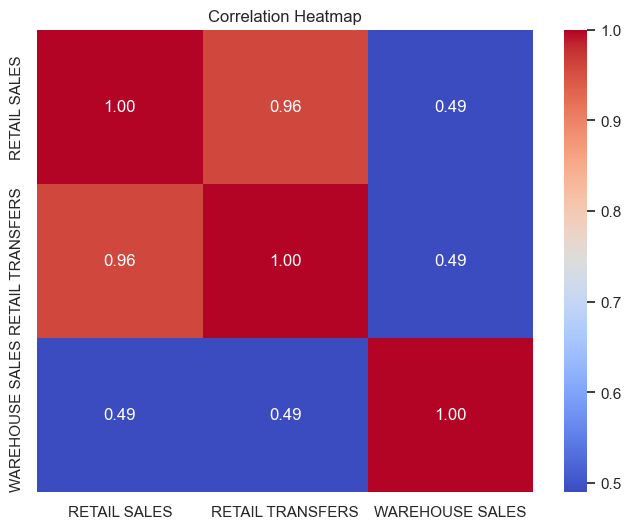

In [13]:
# Part E - Correlation Analysis
corr_matrix = df[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

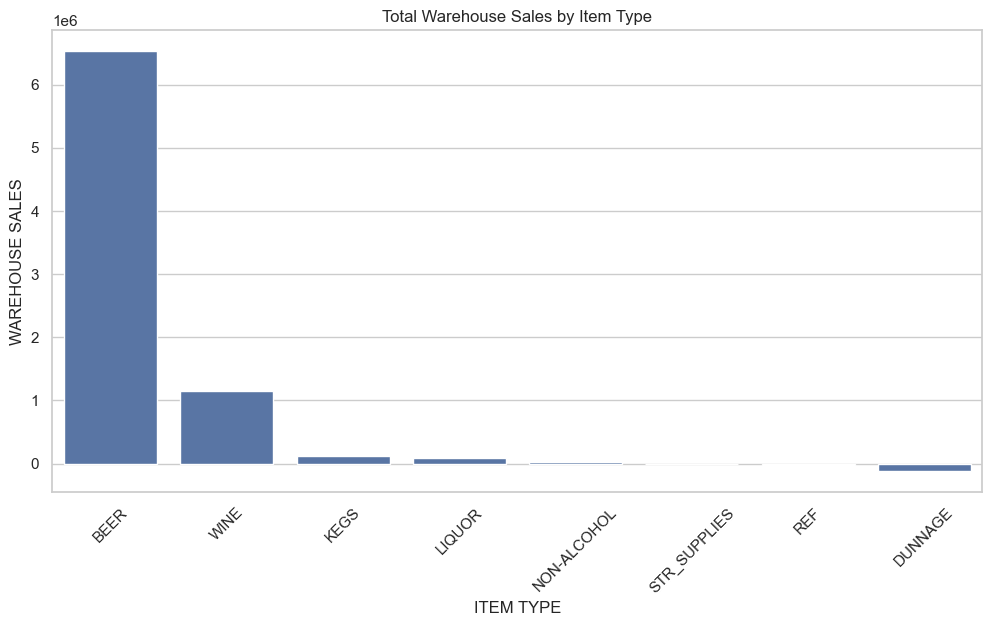

In [14]:
# Q1: Which product category (ITEM TYPE) generates the most warehouse sales?
q1_data = df.groupby('ITEM TYPE')['WAREHOUSE SALES'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=q1_data, x='ITEM TYPE', y='WAREHOUSE SALES')
plt.title('Total Warehouse Sales by Item Type')
plt.xticks(rotation=45)
plt.show()

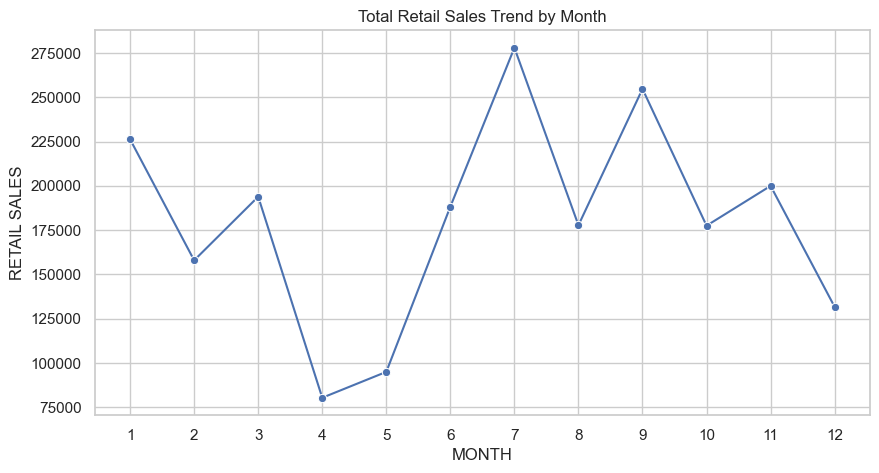

In [15]:
# Q2: How do total retail sales trend by MONTH?
q2_data = df.groupby('MONTH')['RETAIL SALES'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=q2_data, x='MONTH', y='RETAIL SALES', marker='o')
plt.title('Total Retail Sales Trend by Month')
plt.xticks(range(1, 13))
plt.show()

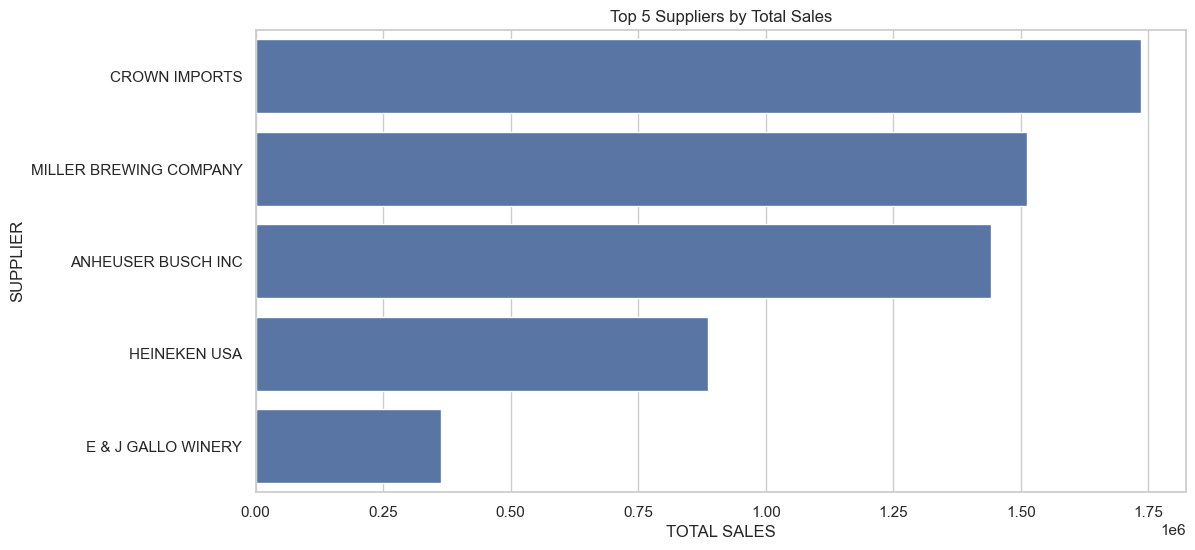

Correlation Matrix:
                  RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES
RETAIL SALES          1.000000          0.960054         0.490472
RETAIL TRANSFERS      0.960054          1.000000         0.492093
WAREHOUSE SALES       0.490472          0.492093         1.000000

Top Item Types by count:
ITEM TYPE
WINE           187640
LIQUOR          64910
BEER            42413
KEGS            10146
NON-ALCOHOL      1908
Name: count, dtype: int64

Sum of Sales by Item Type:
ITEM TYPE
LIQUOR          802691.43
WINE            746498.59
BEER            574220.53
NON-ALCOHOL      34084.31
STR_SUPPLIES      2740.88
REF                663.63
KEGS                 0.00
DUNNAGE              0.00
Name: RETAIL SALES, dtype: float64


In [16]:
# Q3: Who are the top 5 suppliers by total sales (Retail + Warehouse)?
df['TOTAL SALES'] = df['RETAIL SALES'] + df['WAREHOUSE SALES']
q3_data = df.groupby('SUPPLIER')['TOTAL SALES'].sum().sort_values(ascending=False).head(5).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=q3_data, y='SUPPLIER', x='TOTAL SALES')
plt.title('Top 5 Suppliers by Total Sales')
plt.show()

print("Correlation Matrix:")
print(corr_matrix)
print("\nTop Item Types by count:")
print(df['ITEM TYPE'].value_counts().head())
print("\nSum of Sales by Item Type:")
print(df.groupby('ITEM TYPE')['RETAIL SALES'].sum().sort_values(ascending=False))